In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('AirPassengers.csv')
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
## shape of dataset
df.shape

(144, 2)

In [4]:
## check the null value
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [5]:
## information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
df['Month'] = pd.to_datetime(df['Month'])

In [8]:
df.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [10]:
df.set_index('Month',inplace=True)

In [11]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


<AxesSubplot:xlabel='Month'>

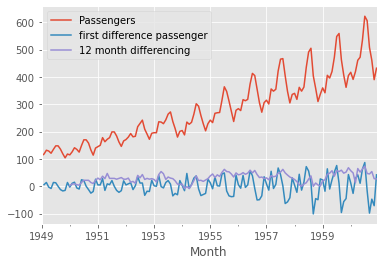

In [26]:
df.plot()

In [13]:
## adfuller test and hypothesis test

In [14]:
from statsmodels.tsa.stattools import adfuller

In [16]:
def adf_test(series):
    result = adfuller(series)
    print('adf stastics:{}'.format(result[0]))
    print('p_value:{}'.format(result[1]))
    if result[1]<0.5:
        print('strong evidence against with null hypothesis, reject the null hypothesis , data has no unit root, it is stationary data')
    else:
            print('weak evidence against wiht null hypothesis , the data is indicating unit root, it is not non-stationary data')

In [17]:
adf_test(df['Passengers'])

adf stastics:0.8153688792060423
p_value:0.9918802434376409
weak evidence against wiht null hypothesis , the data is indicating unit root, it is not non-stationary data


In [18]:
## Differencing , in order to make data is stationary
df['first difference passenger'] = df['Passengers'] - df['Passengers'].shiftft(1)

In [19]:
adf_test(df['first difference passenger'].dropna())

adf stastics:-2.8292668241699874
p_value:0.05421329028382711
strong evidence against with null hypothesis, reject the null hypothesis , data has no unit root, it is stationary data


In [21]:
## 12 month diffferencing
df['12 month differencing'] = df['Passengers'] - df['Passengers'].shift(12)

In [22]:
adf_test(df['12 month differencing'].dropna())

adf stastics:-3.3830207264924805
p_value:0.011551493085514982
strong evidence against with null hypothesis, reject the null hypothesis , data has no unit root, it is stationary data


In [20]:
## find out the lags with help of pacf and acf plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

C:\Users\ThinkPad-T570Worksta\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


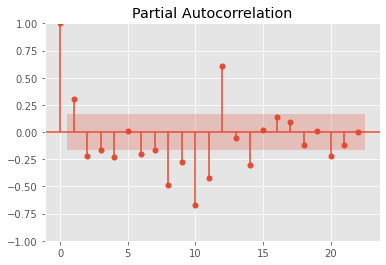

In [24]:
from matplotlib import pyplot as plt
from matplotlib import style
style.use('ggplot')
pcf_plt = plot_pacf(df['first difference passenger'].dropna())

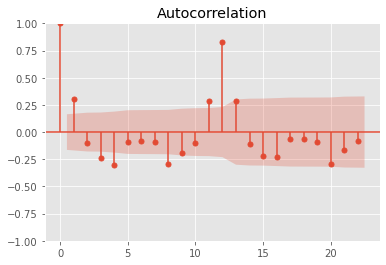

In [25]:
## autocorrection plot
acf_plt = plot_acf(df['first difference passenger'].dropna())

C:\Users\ThinkPad-T570Worksta\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


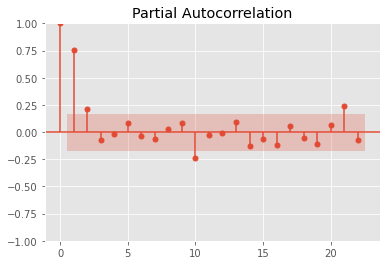

In [27]:
## 12 month partial auto corretion
pcf_12 = plot_pacf(df['12 month differencing'].dropna())

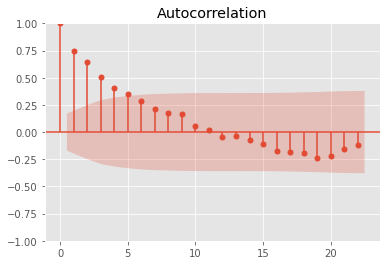

In [28]:
## 12 month auto correction
acf_plot = plot_acf(df['12 month differencing'].dropna())

In [29]:
## train test split
from datetime import datetime,timedelta

In [30]:
train_dataset_end = datetime(1955,12,30)
test_dataset_end = datetime(1960,12,30)
print(train_dataset_end)
print(test_dataset_end)

1955-12-30 00:00:00
1960-12-30 00:00:00


In [32]:
train_data = df[:train_dataset_end]
test_data = df[train_dataset_end+timedelta(days=1):test_dataset_end]


In [33]:
pred_train_end = test_data.index[0]
pred_test_end = test_data.index[-1]
print(pred_train_end)
print(pred_test_end)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [35]:
## train the arima model
from statsmodels.tsa.arima.model import ARIMA

In [36]:
model_arima = ARIMA(train_data['Passengers'],order=(9,1,0))

C:\Users\ThinkPad-T570Worksta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [37]:
## fit the model
model_arima_fit=model_arima.fit()

In [38]:
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   84
Model:                 ARIMA(9, 1, 0)   Log Likelihood                -355.776
Date:                Tue, 09 May 2023   AIC                            731.552
Time:                        03:20:46   BIC                            755.741
Sample:                    01-01-1949   HQIC                           741.270
                         - 12-01-1955                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1114      0.142      0.785      0.433      -0.167       0.390
ar.L2         -0.2697      0.162     -1.664      0.096      -0.587       0.048
ar.L3         -0.1114      0.123     -0.905      0.366      -0.353       0.130
ar.L4         -0.3989      0.121     -3.309      0.001      -0.635      -0.163
ar.L5         -0.0590      0.163     -0.362      0.717      -0.378       0.260
ar.L6         -0.1120      0.134     -0.833      0.405      -0.376       0.151
ar.L7         -0.1020      0.144     -0.708      0.479      -0.385       0.181
ar.L8         -0.4150      0.178     -2.330      0.020      -0.764      -0.066
ar.L9         -0.0986      0.137     -0.720      0.472      -0.367       0.170
sigma2       300.4067     50.018      6.006      0.000     202.373     398.441
===================================================================================
Ljung-Box (L1) (Q):                   1.41   Jarque-Bera (JB):                 6.02
Prob(Q):                              0.24   Prob(JB):                         0.05
Heteroskedasticity (H):               3.20   Skew:                             0.66
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
## prediction 
y_pred_arima=model_arima_fit.predict(start=pred_train_end,end=pred_test_end)

In [41]:
## residual
residual = test_data['Passengers']

<AxesSubplot:ylabel='Density'>

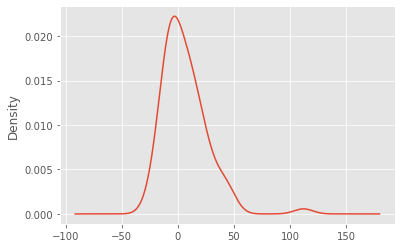

In [42]:
model_arima_fit.resid.plot(kind='kde')

In [43]:
test_data['predicted_arima'] = y_pred_arima

C:\Users\ThinkPad-T570Worksta\AppData\Local\Temp\ipykernel_14416\2145778571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predicted_arima'] = y_pred_arima


<AxesSubplot:xlabel='Month'>

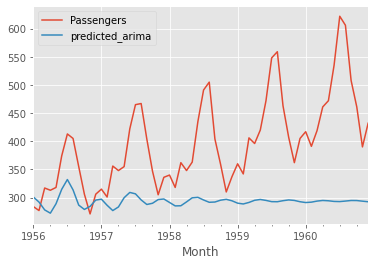

In [46]:
test_data[['Passengers','predicted_arima']].plot()

C:\Users\ThinkPad-T570Worksta\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


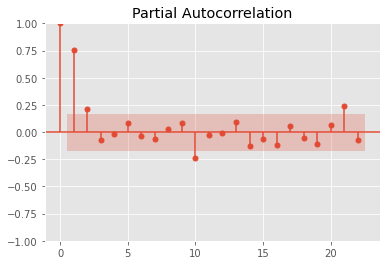

In [47]:
## sarimax model
## 12 month partial auto corretion
pcf_12 = plot_pacf(df['12 month differencing'].dropna())

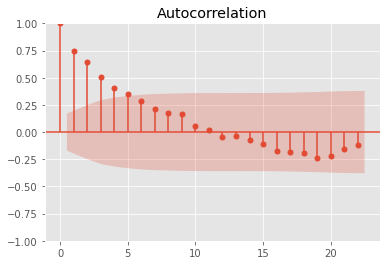

In [48]:
## 12 month auto correction
acf_plot = plot_acf(df['12 month differencing'].dropna())

In [49]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [50]:
model_sarimax = SARIMAX(train_data['Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

C:\Users\ThinkPad-T570Worksta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [52]:
model_sarimax_fit=model_sarimax.fit()

C:\Users\ThinkPad-T570Worksta\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [53]:
model_sarimax_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                          Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Tue, 09 May 2023   AIC                            548.481
Time:                                     03:35:09   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5984      0.937      0.638      0.523      -1.239       2.436
ar.L2          0.8311      0.232      3.581      0.000       0.376       1.286
ar.L3         -0.4526      0.894     -0.507      0.613      -2.204       1.299
ma.L1          0.1837      1.164      0.158      0.875      -2.097       2.465
ma.L2         -0.5342      1.262     -0.423      0.672      -3.007       1.938
ma.L3         -0.0986      0.384     -0.257      0.797      -0.851       0.654
ma.L4         -0.1272      0.337     -0.377      0.706      -0.788       0.534
ma.L5          0.2471      0.357      0.693      0.488      -0.452       0.946
sigma2        87.7321     81.097      1.082      0.279     -71.214     246.679
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [54]:
## prediction 
y_pred_sarimax=model_sarimax_fit.predict(start=pred_train_end,end=pred_test_end)

In [55]:
## residual
residual = test_data['Passengers']

<AxesSubplot:ylabel='Density'>

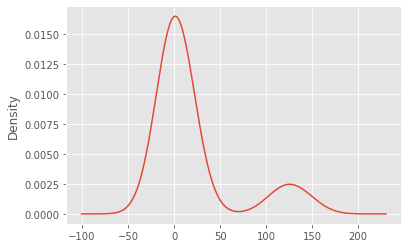

In [56]:
model_sarimax_fit.resid.plot(kind='kde')

In [57]:
test_data['predicted_sarimax'] = y_pred_sarimax

C:\Users\ThinkPad-T570Worksta\AppData\Local\Temp\ipykernel_14416\152908653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predicted_sarimax'] = y_pred_sarimax


<AxesSubplot:xlabel='Month'>

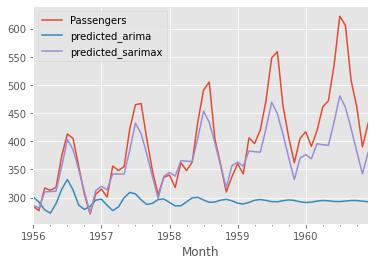

In [58]:
test_data[['Passengers','predicted_arima','predicted_sarimax']].plot()

In [3]:
import pickle
#pickle.dump(2,open('time_forcast_1.pkl','wb'))